# Video Game Market Study

The purpose of this study is to find areas where it may be profitable to create new video games.  According to
market research firm, Newzoo, the video game market accounts for approximately 100 billion in revenue today.
The market is expected to reach 118.6 billion by 2019.

According to Newzoo, Asia accounted for 47% of the market in 2016, and is expected to account for 57% of
growth in upcoming years.  

The data sample used in this study comes from Kaggle, and explores the console video game market from 1980
through early 2017.  The data includes game categories ("genres"), game platforms, sales volumes as well as 
critic and user scores.

This capstone will attempt to answer three questions:
    1. What video game genres are most popular?
    2. What platforms are the most popluar?
    3. Are there disrcepancies between genres and platforms indicating potential underserved markets?


In [263]:
import pandas as pd
df = pd.read_csv('/users/bentonmaples/downloads/Video_Games_Sales_as_at_22_Dec_2016.csv')
import matplotlib.pyplot as plt
import numpy as np


# SECTION 1 - OVERVIEW OF DATASET

This section will take an overview of the data set and assure quality.

In [242]:
print(df.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


Comments:

There is a great deal of missing data in the critic/user comments fields, but we are not using those fields
for now.  The main fields we will use fot this study seem to be robust.

A decsription of the data:

In [323]:
# Describe data
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000



There appears to be some games with improper dates.  We see in the max category that there
are sales registered for games with Year_of_Release at 2020, which is in the future.  So some
of that data must be erroneous

We can also see that the standard of deviation in sales is higher in North America that in the 
global market.  This suggests a wider gap between successful and unssuccessful games in North
America compared to other markets.  This is farther confirmed with top 25% of games accounting
for 3 times the sales volume of bottom 75% in North America, whereas globally the top 25%
has sold just under twice as much as bottom 75%.

Let us do a sanity check and plot the number of Game releases per year to see visualize our data
amd see of the bad ranges on Year_of_Release reveal a deeper problem with our data set.


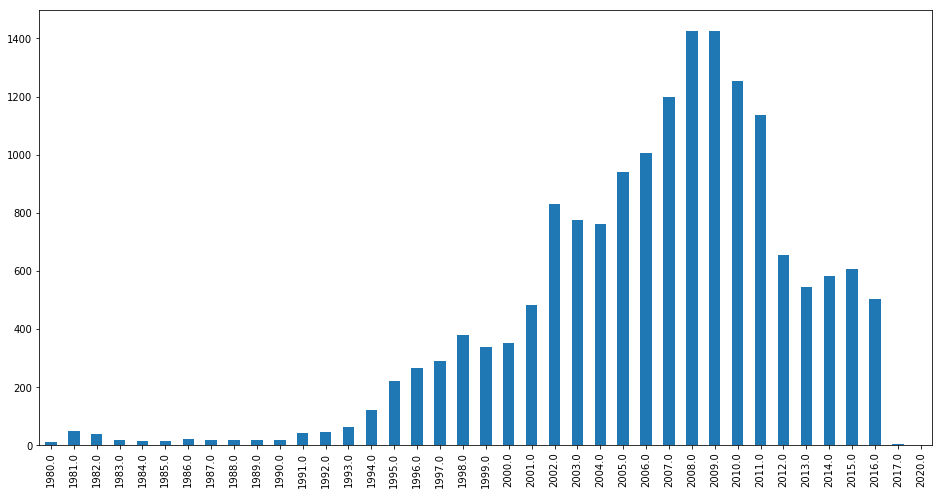

In [325]:

yaxis = df.Year_of_Release.value_counts(sort=False)

yaxis.sort_index(ascending=True, inplace=True)

yaxis.plot(kind="bar", sort_columns=True, figsize = (16,8))

plt.show()

The data set appears good, and it appears there is just a tiny sample of games with Year_of_Release
data that is in the future.

# SECTION 2 - Asnwering Questions

1. What video game genres are most popular?

2. What platforms are various genres most popular on?

3. Are there anomolies where a particular genre is underserved on a particular platform?

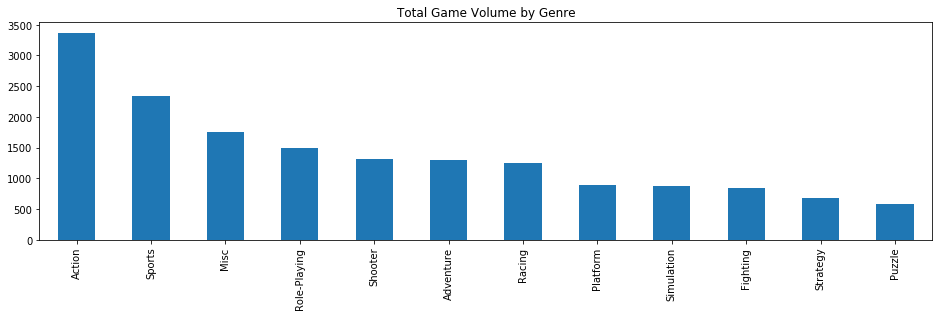

In [226]:
# We will now look at total number of games produced by genre

yaxis = df.Genre.value_counts()

yaxis.plot(kind="bar", figsize = (16,4))
plt.title('Total Game Volume by Genre - All Time')
plt.show()


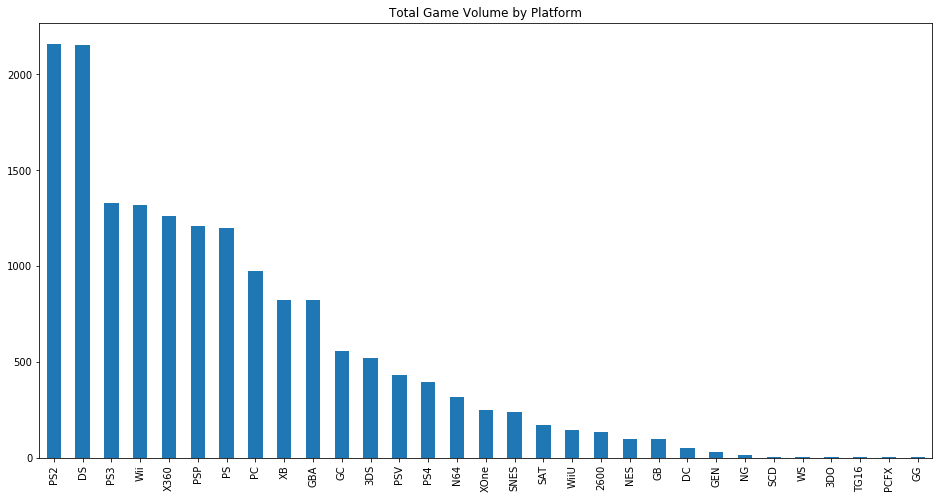

In [227]:
# We will look at total game volume by platform

yaxis = df.Platform.value_counts()

yaxis.plot(kind="bar", figsize = (16,8))
plt.title('Total Game Volume by Platform - All Time')
plt.show()


These graphs give us a good representation of popularity of genres and platforms since 1980.  However,
it would be interesting to see what the perfomance has been recently and if there have been any recent 
changes.  To discover this, we will create the same graphs limiting ourselves to the years since 2014.

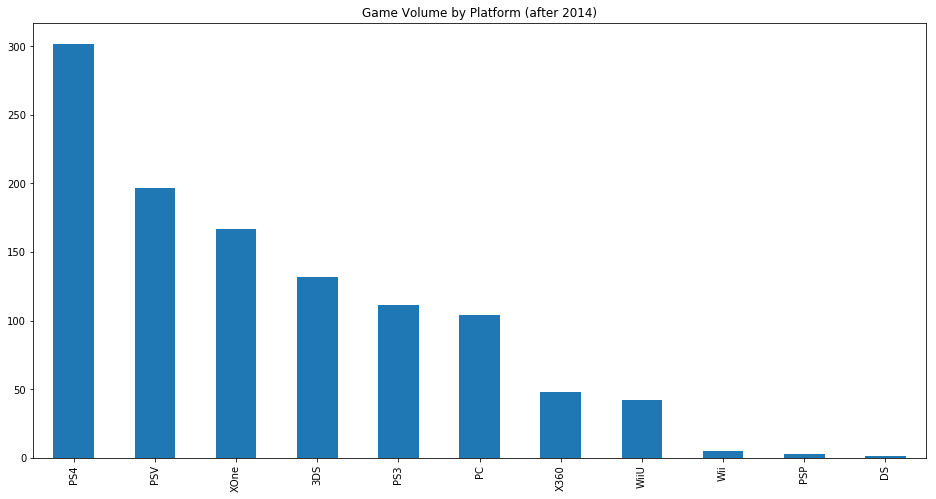

In [229]:
df2 = df[df['Year_of_Release']>2014]

yaxis = df2.Platform.value_counts()

yaxis.plot(kind="bar", figsize = (16,8))
plt.title('Game Volume by Platform (since 2014)')
plt.show()

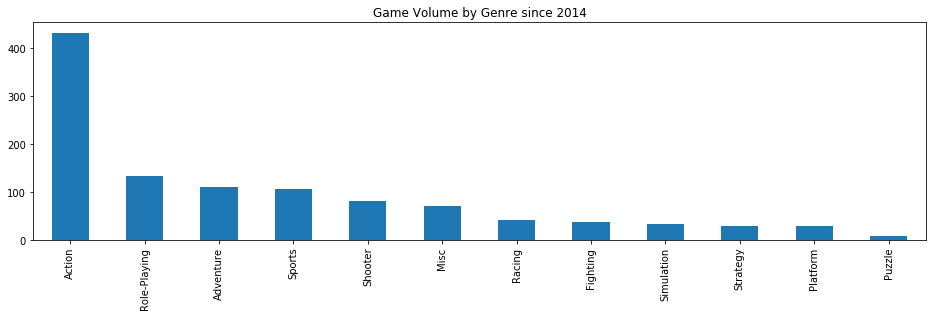

In [230]:
# And let us look at recent game volume by genre

yaxis = df2.Genre.value_counts()

yaxis.plot(kind="bar", figsize = (16,4))
plt.title('Game Volume by Genre since 2014')
plt.show()

Since 2014, Role-playing and Adventure games have seen more games produced than they historically have.  We have
8 platforms that continue to see sales since 2014.  

We now see some discrepancies between historic popularity and recent trends which gives us a window into
possible anomolies.  We see more role-playing and adventure games in recent years.  We will now look specficially
into these two categories to discover if these game types are under or overrepresented on certain platforms
in recent years.

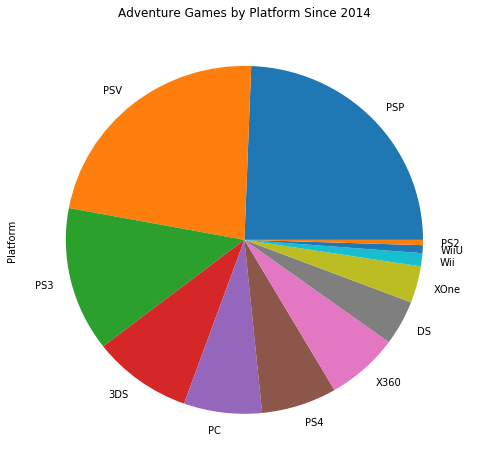

In [330]:
df3 = df[df['Year_of_Release']>2010]
df4 = df3[df3['Genre']=='Adventure']


yaxis = df4.Platform.value_counts()

yaxis.plot(kind="pie", figsize = (8,8))
plt.title('Adventure Games by Platform Since 2014')
plt.show()

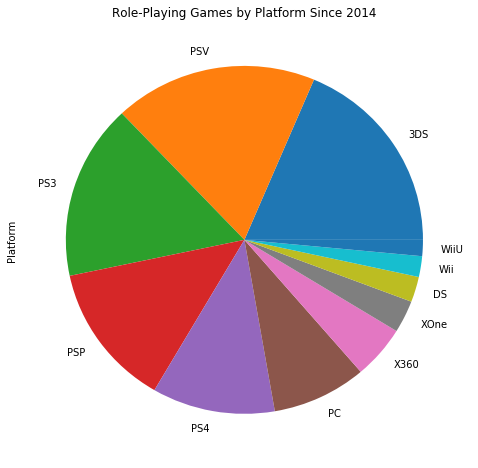

In [328]:
df5 = df3[df3['Genre']=='Role-Playing']

yaxis = df5.Platform.value_counts()

yaxis.plot(kind="pie", figsize = (8,8))
plt.title('Role-Playing Games by Platform Since 2014')
plt.show()

We see that avendture games have an unusually high occurance on the PSP platform, while role-playing
games have an unusually high occurance on the 3DS platform.  Both of these platforms would seem to 
be low growth platforms, but it would be interesting to delve into these markets in more detail
to understand why these genres over perform on these platforms.

In the larger picture, this data set does not give the ability with limited tools to determine value of a
potential new game title.


# SECTION 3 - Proposed Research

Finding trends in this data that could lend thmselves to finding good product categories for new
game releases is challenging given my limited skill set.

It seems that what is really needed is a predictive model that will project how well a given game
in a given category released by a given manufacturer would be expected to perform.  In order to achieve
this, I believe it would require machine learning and regression techniques.  Additionally I expect 
it would require an alaysis of games that are part of a franchise (i.e. Call of Duty) vs. those that
are not. 

Ideally a sophisticated model like this could project sales volume for a given category on a given platform
for a new manufcaturer, thererby revelealing best markets for a startup to approach.